#Question 3 Dropout


# Assignment 1

Discussed with : Ramki Ramamurthy and Sushant Kotwal

References:</br>
1.https://www.tensorflow.org/tutorials/quickstart/beginner </br>
2.https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/</br>
3.https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/</br>
4.https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin</br>
5.https://www.machinelearningplus.com/plots/subplots-python-matplotlib/#:~:text=Subplots%20mean%20a%20group%20of,canvas%20that%20holds%20multiple%20plots. </br>
6.https://numpy.org/doc/stable/reference/generated/numpy.argsort.html </br>
7.https://www.tensorflow.org/guide/keras/sequential_model </br>
8  https://github.com/tensorflow/tensorflow/issues/46076 </br>
9.https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc </br>
10.https://www.tensorflow.org/guide/keras/sequential_model </br>

In [ ]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import keras
import keras.utils
from keras import utils as np_utils
%matplotlib inline  

Found GPU at: /device:GPU:0


In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


Code to check if GPU is working or not

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.84314445199999
GPU (s):
0.0411745189999948
GPU speedup over CPU: 69x


In [ ]:
# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


we might want to flatten data later to 784 as 28,28 might give issues.

In [ ]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


Data Preprocessing and Normalisation

In [ ]:
# One way of flattening input, chose this I faced many issues with input shapes while doing it inside the model
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784) 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

One Hot Encoding

In [ ]:
import keras
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

Function to define model

In [ ]:
def define_model_no_drop(act_fxn,init):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1024, input_shape=(28*28,), activation=act_fxn, kernel_initializer=init),
    tf.keras.layers.Dense(units=1024, activation=act_fxn,  kernel_initializer=init),
    tf.keras.layers.Dense(units=1024, activation=act_fxn,  kernel_initializer=init),
    tf.keras.layers.Dense(units=1024, activation=act_fxn,  kernel_initializer=init),
    tf.keras.layers.Dense(units=1024, activation=act_fxn,  kernel_initializer=init),
    tf.keras.layers.Dense(units=10, activation="softmax")
  ])
  return model 

Initializations

In [ ]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
xavier_ini_normal = tf.keras.initializers.GlorotNormal()
xavier_initializer = tf.keras.initializers.GlorotUniform()
he_initializer = tf.keras.initializers.HeNormal()

In [ ]:
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Activation, Flatten

In [ ]:
model1 = define_model_no_drop(act_fxn= 'sigmoid',init =xavier_ini_normal )


model3 = define_model_no_drop(act_fxn= 'relu',init = he_initializer)

Defining models that require dropout seperately

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28*28,)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10,activation = 'softmax')
])



In [ ]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28*28,)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))



Epoch 1/500
469/469 [==============================] - 4s 5ms/step - loss: 1.0693 - accuracy: 0.6047 - val_loss: 0.2974 - val_accuracy: 0.9111
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2362 - accuracy: 0.9298 - val_loss: 0.1819 - val_accuracy: 0.9471
Epoch 3/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1529 - accuracy: 0.9548 - val_loss: 0.1287 - val_accuracy: 0.9625
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1174 - accuracy: 0.9649 - val_loss: 0.1153 - val_accuracy: 0.9653
Epoch 5/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0902 - accuracy: 0.9728 - val_loss: 0.1080 - val_accuracy: 0.9701
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0753 - accuracy: 0.9776 - val_loss: 0.1148 - val_accuracy: 0.9677
Epoch 7/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.0927 - val_accuracy: 0.9737

In the above step we compiled all models and got its history out in one cell as it gave issues when I did it sepertely, asked the TA too and she did tell me seperately it might cause issues. I do not know right now why exacty, maybe cause i modularised code. But i will search this in detail later.

Lets plot the Train loss vs Test loss for both dropout and no dropout

# Compiled here as above one had a mistake if i had re run it then i would have to re run 4 models for 500 epoch. Hence i chose to run it again below just for the dropout models.

Mistake: I had put the dropouts at the wrong places. I put one in layer to output that gave very wrong results as output layers were getting dropped.


**Earlier model:**

model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28*28,)),</br>
  
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.2),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(10,activation = 'softmax')</br>
])

**Corrected Model:**

model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28*28,)),</br>
  tf.keras.layers.Dropout(0.2),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dropout(0.5),</br>
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),</br>
  tf.keras.layers.Dense(10,activation = 'softmax')</br>
])



**PS: Colab runtime got disconnected and i lost previous run data. hence had to run all of the models again :)**

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))

Epoch 1/500
469/469 [==============================] - 3s 6ms/step - loss: 1.0432 - accuracy: 0.6260 - val_loss: 0.3119 - val_accuracy: 0.9074
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.3432 - accuracy: 0.8965 - val_loss: 0.1987 - val_accuracy: 0.9418
Epoch 3/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2562 - accuracy: 0.9233 - val_loss: 0.1781 - val_accuracy: 0.9490
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2142 - accuracy: 0.9372 - val_loss: 0.1360 - val_accuracy: 0.9604
Epoch 5/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1861 - accuracy: 0.9445 - val_loss: 0.1230 - val_accuracy: 0.9651
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1648 - accuracy: 0.9505 - val_loss: 0.1044 - val_accuracy: 0.9686
Epoch 7/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1508 - accuracy: 0.9546 - val_loss: 0.1036 - val_accuracy: 0.9703

In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))

Epoch 1/500
469/469 [==============================] - 3s 5ms/step - loss: 0.4854 - accuracy: 0.8472 - val_loss: 0.1507 - val_accuracy: 0.9563
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1990 - accuracy: 0.9433 - val_loss: 0.1256 - val_accuracy: 0.9640
Epoch 3/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1564 - accuracy: 0.9549 - val_loss: 0.1040 - val_accuracy: 0.9697
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1357 - accuracy: 0.9626 - val_loss: 0.0884 - val_accuracy: 0.9765
Epoch 5/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1221 - accuracy: 0.9659 - val_loss: 0.0771 - val_accuracy: 0.9775
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1099 - accuracy: 0.9701 - val_loss: 0.0838 - val_accuracy: 0.9769
Epoch 7/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1055 - accuracy: 0.9714 - val_loss: 0.0805 - val_accuracy: 0.9793

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))


Epoch 1/500
469/469 [==============================] - 3s 6ms/step - loss: 0.8787 - accuracy: 0.6944 - val_loss: 0.2918 - val_accuracy: 0.9130
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2486 - accuracy: 0.9272 - val_loss: 0.2212 - val_accuracy: 0.9355
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1707 - accuracy: 0.9494 - val_loss: 0.1528 - val_accuracy: 0.9544
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1232 - accuracy: 0.9632 - val_loss: 0.1353 - val_accuracy: 0.9603
Epoch 5/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1011 - accuracy: 0.9694 - val_loss: 0.1249 - val_accuracy: 0.9650
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0813 - accuracy: 0.9754 - val_loss: 0.1089 - val_accuracy: 0.9690
Epoch 7/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.0938 - val_accuracy: 0.9727

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, batch_size=128, epochs=500,verbose=True,validation_data=(X_test, y_test))

Epoch 1/500
469/469 [==============================] - 3s 5ms/step - loss: 0.2148 - accuracy: 0.9347 - val_loss: 0.1288 - val_accuracy: 0.9603
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0938 - accuracy: 0.9722 - val_loss: 0.1047 - val_accuracy: 0.9692
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.0946 - val_accuracy: 0.9769
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0778 - val_accuracy: 0.9784
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0427 - accuracy: 0.9875 - val_loss: 0.1082 - val_accuracy: 0.9710
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0407 - accuracy: 0.9889 - val_loss: 0.1152 - val_accuracy: 0.9711
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0351 - accuracy: 0.9901 - val_loss: 0.1014 - val_accuracy: 0.9764

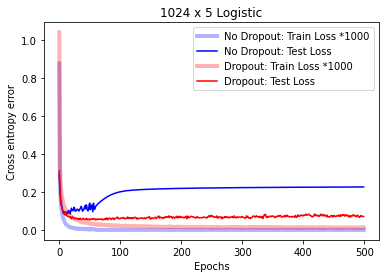

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history1.history['loss'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(history1.history['val_loss'], color = 'blue')
plt.plot(history2.history['loss'],color='red',linewidth=4.0,alpha=0.3)
plt.plot(history2.history['val_loss'], color = 'red')

plt.legend(['No Dropout: Train Loss *1000','No Dropout: Test Loss','Dropout: Train Loss *1000','Dropout: Test Loss'])
plt.yticks(np.arange(0,1.2,0.2))
plt.xlabel('Epochs')
plt.ylabel('Cross entropy error')
plt.title('1024 x 5 Logistic')
plt.show()


We can see that dropout decreases validation losses. In the sense the model works better on unkown data after dropout.

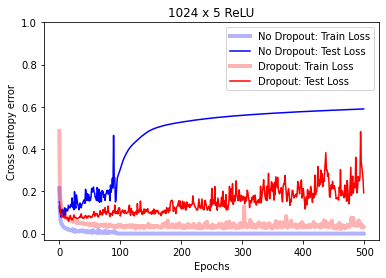

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history3.history['loss'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(history3.history['val_loss'], color = 'blue')
plt.plot(history4.history['loss'],color='red',linewidth=4.0,alpha=0.3)
plt.plot(history4.history['val_loss'], color = 'red')

plt.legend(['No Dropout: Train Loss','No Dropout: Test Loss','Dropout: Train Loss','Dropout: Test Loss'])
plt.yticks(np.arange(0,1.2,0.2))
plt.xlabel('Epochs')
plt.ylabel('Cross entropy error')
plt.title('1024 x 5 ReLU')
plt.show()

In Relu, We can see all training losses to be low but the losses on unseen data increases. One thing is for sure is that dropout seems to reduce the error on unseen data. So in a way it reduceses overfitting. 

I also feel that internally dropout increases sparsity hence we can see a increase in performance in both RELU and SIGMOID.

Model Saving

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

 
# assign location
path=F"/content/gdrive/My Drive/Models/model1"
 
# save
model1.save_weights(path,save_format='tf')
# assign location
path=F"/content/gdrive/My Drive/Models/model2"
model2.save_weights(path,save_format='tf')
# assign location
path=F"/content/gdrive/My Drive/Models/model3"
model3.save_weights(path,save_format='tf')
# assign location
path=F"/content/gdrive/My Drive/Models/model4"
model4.save_weights(path,save_format='tf')

In [ ]:
# assign location
path=F"/content/gdrive/My Drive/Models/DLHW1Q3model1"
 
# save
model1.save(path,save_format='tf')
# assign location
path=F"/content/gdrive/My Drive/Models/DLHW1Q3model2"
model2.save(path,save_format='tf')
# assign location
path=F"/content/gdrive/My Drive/Models/DLHW1Q3model3"
model3.save(path,save_format='tf')
# assign location
path=F"/content/gdrive/My Drive/Models/DLHW1Q3model4"
model4.save(path,save_format='tf')

In [ ]:
model1.save("name.h5")

In [ ]:
model2.save("name.h5")

In [ ]:
model3.save("name.h5")

In [ ]:
model4.save("name.h5")